In [1]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import pandas as pd
import psycopg2
import getpass
import s3fs
import boto3
import os


class Redshift:

    def __init__(self):
        host = "sc-redshift-instance.cjnte6rjhunx.us-east-1.redshift.amazonaws.com"
        self.user = user
        self.password = password
        port = 8192
        dbname = "scredshift"
        sslmode = 'require'
        self.conn = psycopg2.connect(
            dbname=dbname, host=host, port=port, user=user, password = password, sslmode = sslmode)

    def list_weather(self):
        weather = pd.read_sql_query(
            "SELECT * FROM amazon_air.avops LIMIT 1000", self.conn)
        return weather

In [2]:
user = input("User: ")
password = getpass.getpass("Password: ")

User: trevorb_rw
Password: ········


In [3]:
wx = Redshift().list_weather()

In [4]:
wx.head()

,departure_date,airline,tail_num,atsgvrid,amazonvrid,flight_num,mianbr,airplane_type,origin,schedule_departure_time,...,total_a_delay,load_forecast,departure_taxi,takeoff_diff,land_diff,land_taxi,total_departure_delay,actual_arrival_delay,route,gross_payload
0,2016-04-01,ABX,N768AX,3102160401,None,3102,3703106,F767-200,ONT,2016-04-01 10:30:00,...,0.0,0.377,10.0,-8.0,46.0,-5.0,-18.0,-41.0,ONT->ILN,None
1,2016-04-01,ABX,N768AX,3104160401,None,3104,3703107,F767-200,ILN,2016-04-01 16:30:00,...,0.0,0.498,4.0,-11.0,29.0,-5.0,-15.0,-24.0,ILN->TPA,None
2,2016-04-01,ATN,N791AX,3008160401,None,3008,None,F767-200,DFW,2016-04-01 03:45:00,...,0.0,0.000,0.0,-225.0,355.0,0.0,-225.0,-355.0,DFW->ILN,None
3,2016-04-01,ATN,N364CM,3002160401,None,3002,305395,F767-300,ILN,2016-04-01 16:00:00,...,0.0,0.705,9.0,14.0,10.0,-4.0,5.0,-6.0,ILN->ABE,None
4,2016-04-01,ATN,N791AX,3001160401,None,3001,313809,F767-200,ABE,2016-04-01 12:15:00,...,0.0,0.776,12.0,4.0,19.0,-6.0,-8.0,-13.0,ABE->ILN,None


In [5]:
wx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   departure_date            1000 non-null   datetime64[ns]
 1   airline                   1000 non-null   object        
 2   tail_num                  1000 non-null   object        
 3   atsgvrid                  1000 non-null   object        
 4   amazonvrid                0 non-null      object        
 5   flight_num                1000 non-null   object        
 6   mianbr                    979 non-null    object        
 7   airplane_type             1000 non-null   object        
 8   origin                    1000 non-null   object        
 9   schedule_departure_time   1000 non-null   datetime64[ns]
 10  out_time                  1000 non-null   datetime64[ns]
 11  off_time                  1000 non-null   datetime64[ns]
 12  estimated_arrival_tim

In [6]:
wx['departure_date'].value_counts()

2016-06-13    20
2016-05-25    19
2016-05-23    18
2016-05-29    16
2016-06-02    15
              ..
2016-04-05    12
2016-04-13    12
2016-05-03    12
2016-05-07    12
2016-06-15     3
Name: departure_date, Length: 76, dtype: int64

In [7]:
wx.describe()

,d_delay_time_1,d_delay_time_2,d_delay_time_3,a_delay_time_1,a_delay_time_2,a_delay_time_3,fuel_upliftplanned,fuel_upliftactual,planned_fuel_burn,actual_fuel_burn,...,bh_diff,total_d_delay,total_a_delay,load_forecast,departure_taxi,takeoff_diff,land_diff,land_taxi,total_departure_delay,actual_arrival_delay
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,817.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,5.178000,0.244000,0.010000,0.444000,0.003000,0.0,46933.876000,4090.613000,28329.675000,27536.004000,...,-13.074000,5.097919,0.44700,0.644134,14.705000,-3.919000,30.919000,-3.264000,-18.62400,-27.655000
std,15.769115,3.826108,0.316228,2.374132,0.094868,0.0,17910.843633,2804.515752,12522.017061,12375.052527,...,24.907648,16.660765,2.39686,0.152910,65.101522,124.255406,133.722085,40.733199,104.63564,130.009147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,-257.000000,0.000000,0.00000,0.000000,0.000000,-1035.000000,-665.000000,-188.000000,-1035.00000,-1290.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,33000.000000,1971.000000,18299.000000,17500.000000,...,-17.000000,0.000000,0.00000,0.588750,4.000000,-12.000000,12.000000,-6.000000,-21.00000,-33.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,48000.000000,3542.500000,30110.500000,29100.000000,...,-10.000000,0.000000,0.00000,0.656000,8.000000,-1.000000,26.000000,-5.000000,-10.00000,-20.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,54600.000000,5805.750000,38731.250000,37600.000000,...,-3.750000,0.000000,0.00000,0.728000,12.000000,9.000000,38.250000,-3.000000,0.00000,-6.000000
max,184.000000,90.000000,10.000000,27.000000,3.000000,0.0,130071.000000,11301.000000,87452.000000,77270.000000,...,30.000000,184.000000,27.00000,0.995000,825.000000,810.000000,1290.000000,786.000000,184.00000,665.000000


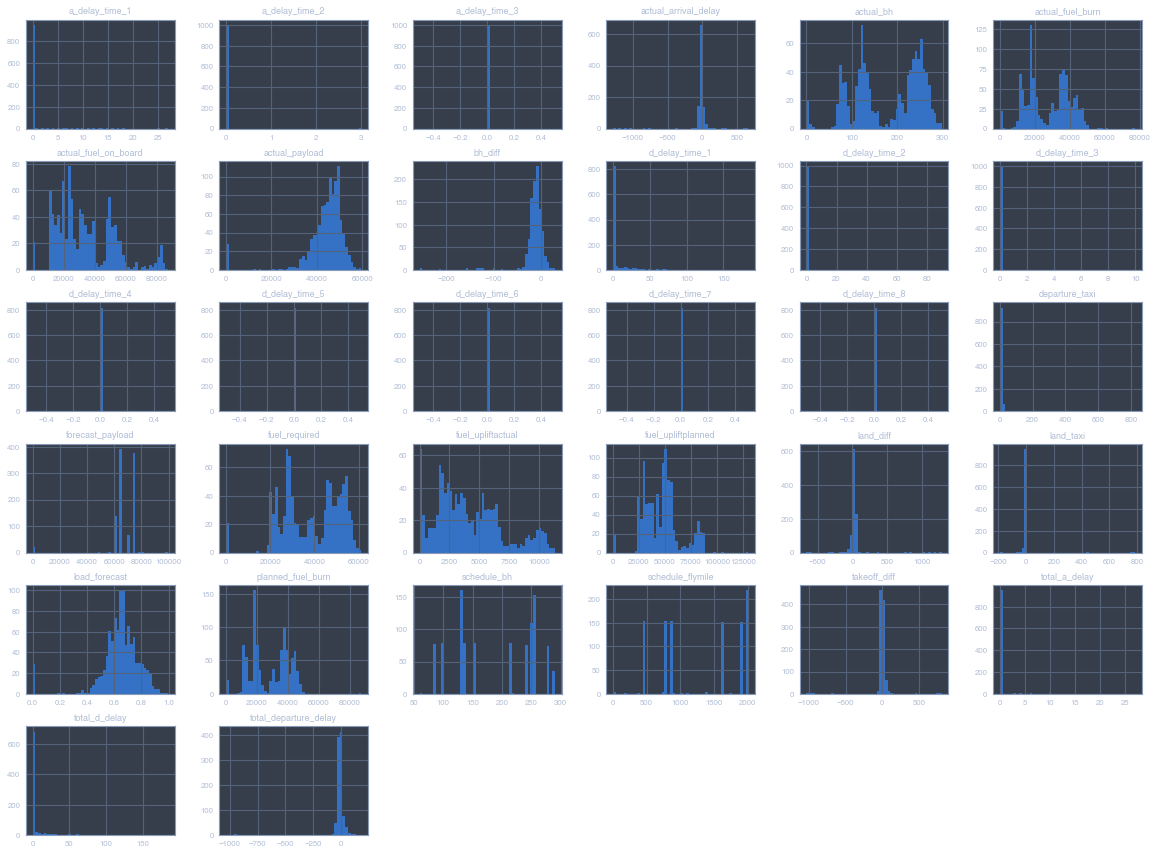

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
wx.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wx, test_size=0.2, random_state=42)

In [10]:
corr_matrix = wx.corr()
corr_matrix['actual_fuel_burn'].sort_values(ascending=False)

actual_fuel_burn         1.000000
actual_bh                0.966374
planned_fuel_burn        0.952887
schedule_bh              0.926773
fuel_required            0.920448
schedule_flymile         0.914542
fuel_upliftplanned       0.828907
fuel_upliftactual        0.687597
actual_fuel_on_board     0.572337
forecast_payload         0.359877
bh_diff                  0.304226
actual_payload           0.280804
total_departure_delay    0.239770
actual_arrival_delay     0.191538
load_forecast            0.141822
takeoff_diff             0.110473
total_a_delay            0.069680
a_delay_time_1           0.068807
d_delay_time_3           0.041090
a_delay_time_2           0.038533
d_delay_time_2          -0.000602
total_d_delay           -0.059387
d_delay_time_1          -0.071197
land_taxi               -0.101124
land_diff               -0.155417
departure_taxi          -0.174522
a_delay_time_3                NaN
d_delay_time_4                NaN
d_delay_time_5                NaN
d_delay_time_6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25469cd0>,
      dtype=object)

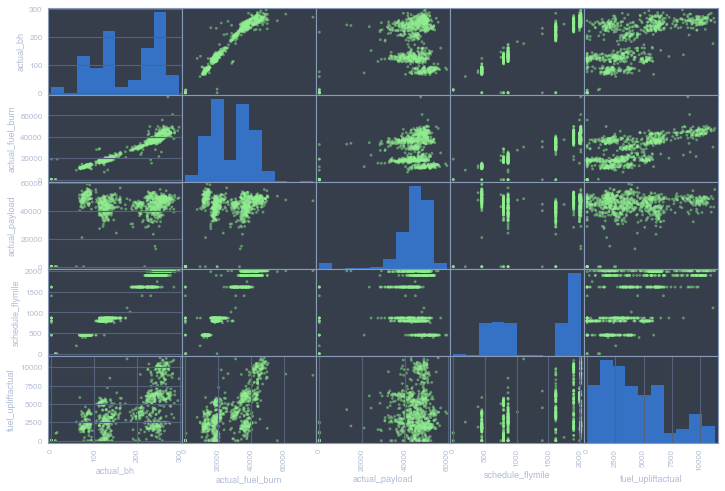

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["actual_bh", "actual_fuel_burn", "actual_payload", "schedule_flymile", "fuel_upliftactual"]
scatter_matrix(train_set[attributes], figsize=(12,8), color='lightgreen', alpha=.5)

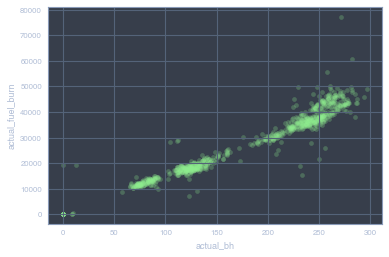

In [14]:
train_set.plot(kind="scatter", x="actual_bh", y="actual_fuel_burn", alpha=0.25, color = 'lightgreen')